In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# print("part 1 contains",len(os.listdir('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/')),'images')
# print("part 2 contains",len(os.listdir('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/')),'images')

# **Libraries Required For This Project**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import tqdm

# **Reading Metadat CSV**

In [4]:
# previous Version
metadata_df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
metadata_df.info()
metadata_df.head()
img_size=64
# metadata_df = pd.read_csv("../input/ham1000-myversion-dataframe/my_dataset.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


# **Dictionary Consisting { Image_id : Image_Path}**

In [5]:

# image_part_1_dir = os.listdir("../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1")
# image_dir_1 = []
# for i in range(len(image_part_1_dir)):
#     image_dir_1.append('../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'+'/'+image_part_1_dir[i])

# image_part_2_dir = os.listdir("../input/skin-cancer-mnist-ham10000/HAM10000_images_part_2")
# image_dir_2 = []
# for i in range(len(image_part_2_dir)):
#     image_dir_2.append('../input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'+'/'+image_part_2_dir[i])    

# final_img_dir = image_dir_1+ image_dir_2
# final_merged_dir = image_part_1_dir + image_part_2_dir
# from collections import defaultdict
# dir_image = defaultdict(list)
# for i in range(len(final_img_dir)):
#     path = final_img_dir[i]
#     x = (final_merged_dir[i])
#     img_id = x.split('.')[0]
#     dir_image[img_id].append(path)
# base_skin_dir = os.path.join('/kaggle/','input')
# #print(base_skin_dir)

# dir_image = {os.path.splitext(os.path.basename(x))[0]: 
#                      x for x in (glob(os.path.join(base_skin_dir,'*','*','*.jpg')))}

In [6]:
# # #Creating feature and label data
dataset_df = pd.DataFrame(columns=['image_id','image_path','image','label'])

In [7]:
dataset_df['image_id'] = metadata_df['image_id']
# dataset_df['image_path'] = (dataset_df['image_id'].map(dir_image.get)).astype(str)    
# dataset_df['image'] = (dataset_df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((img_size,img_size)))))
dataset_df['label'] = metadata_df['dx'] 

In [8]:
dataset_df['label'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: label, dtype: int64

In [9]:
# X = np.load('/kaggle/input/my-x-y-data/X_data.npy',allow_pickle= True)
# Y= np.load('/kaggle/input/my-x-y-data/Y_data.npy',allow_pickle= True)
# # dataset_df.to_csv("./my_set.csv")

In [10]:
# Y_label = np.asarray(pd.Categorical(dataset_df['label']).codes)
# X_data = np.asarray(dataset_df['image'].tolist())
X_data = np.load('/kaggle/input/64x64-x/64_X.npy',allow_pickle= True)
Y_label = np.load('/kaggle/input/64x64-x/64_Y.npy',allow_pickle= True)
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
Y_data = label_binarizer.fit_transform(Y_label)

In [11]:
from collections import Counter

In [12]:
clas = Counter(np.argmax(Y_data,axis=1))
print(clas)
dataset_df['label'].value_counts()

Counter({5: 6705, 4: 1113, 2: 1099, 1: 514, 0: 327, 6: 142, 3: 115})


nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: label, dtype: int64

In [13]:
X_data.shape

(10015, 64, 64, 3)

In [14]:
x_train,x_temp,y_train,y_temp=train_test_split(X_data,Y_data,test_size=0.4)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5)
# del X
# del Y

In [15]:
x_val =x_val/255.0
x_test = x_test/255.0
x_train = x_train/255.0

In [16]:
print(x_train.shape)
print(Counter(np.argmax(y_train,axis=1)))
print(Counter(np.argmax(y_test,axis=1)))
print(Counter(np.argmax(y_val,axis=1)))

(6009, 64, 64, 3)
Counter({5: 4050, 4: 673, 2: 650, 1: 307, 0: 178, 6: 83, 3: 68})
Counter({5: 1332, 2: 230, 4: 216, 1: 100, 0: 70, 6: 31, 3: 24})
Counter({5: 1323, 4: 224, 2: 219, 1: 107, 0: 79, 6: 28, 3: 23})


In [17]:
from imblearn.over_sampling import RandomOverSampler 

x_train = x_train.reshape(x_train.shape[0],img_size*img_size*3)
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)
x_train = np.array(x_train).reshape(-1,img_size,img_size,3)
print('Shape of Data :',x_train.shape)

Shape of Data : (28350, 64, 64, 3)


In [18]:
# X= np.load('/kaggle/input/x-data/X_data (1).npy')
# Y=np.load('/kaggle/input/y-data/Y_data (1).npy')

In [19]:
# def split_data(X):
#     # Prepare data for training and testing the model
#     train_datagen = ImageDataGenerator(rescale = 1./255,
#                                   rotation_range = 10,
#                                   width_shift_range = 0.2,
#                                   height_shift_range = 0.2,
#                                   shear_range = 0.2,
#                                   horizontal_flip = True,
#                                   vertical_flip = True,
#                                   fill_mode = 'nearest')
#     X_train = train_datagen.fit(X)

#     return X_train

In [20]:

# x_train= split_data(x_train)

# del X

In [21]:
import matplotlib.pyplot as plt

Counter({5: 4050, 0: 4050, 2: 4050, 4: 4050, 6: 4050, 1: 4050, 3: 4050})


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


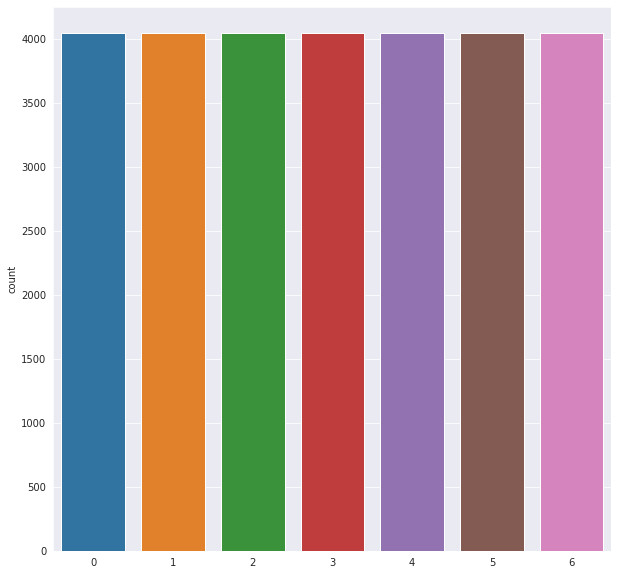

In [22]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(np.argmax(y_train,axis=1))
print(Counter(np.argmax(y_train,axis=1)))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

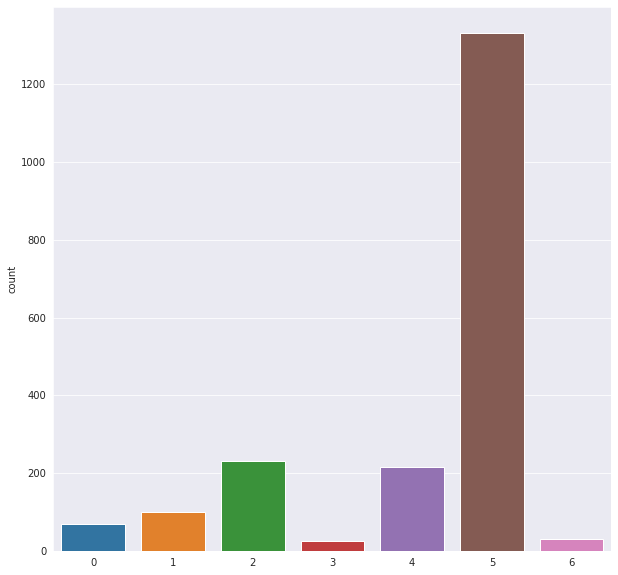

In [23]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(np.argmax(y_test,axis=1))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

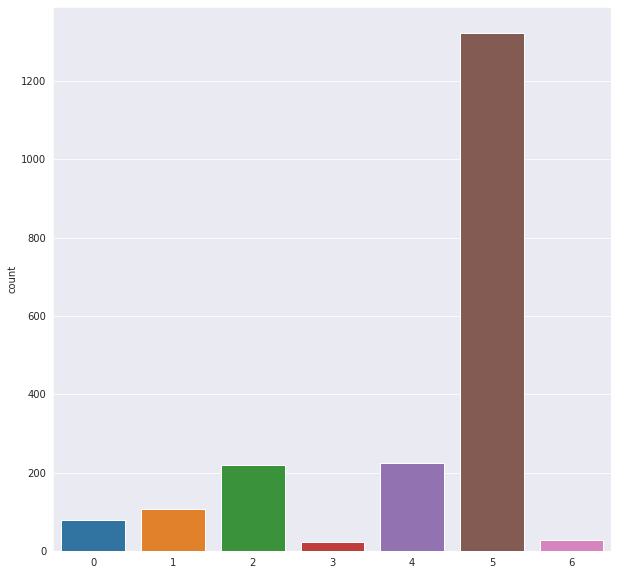

In [24]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(np.argmax(y_val,axis=1))

In [25]:
x_val.shape

(2003, 64, 64, 3)

In [26]:
# # class_weights = class_weight.compute_sample_weight('balanced',y_train)
# # #to insert class weight in Keras, I need to pass class weight as a dictionary
# # class_weights = dict(enumerate(class_weights))
# from sklearn.utils.class_weight import compute_class_weight
# class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(np.argmax(y_val,axis=1)), y= np.argmax(y_val,axis=1))
# class_weights = dict(enumerate(class_weights))

# **Plotting classwise data**

In [27]:
# number = dataset_df.groupby('label')['label'].count()
# import matplotlib.pyplot as plt

# courses = list(number.keys())
# values = list((number.values)*100/10015)
  
# fig = plt.figure(figsize = (10, 5))
 
# # creating the bar plot
# plt.bar(courses, values, color ='blue',
#         width = 0.8)
 
# plt.xlabel("Diseases")
# plt.ylabel("Percentage")
# plt.title("Class Wise Data Distribution (In percentage)")
# plt.grid(True)
# plt.show()

# **Attention Model**

In [28]:
# #CBAM Attention
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

def attach_attention_module(net, attention_module):
    if attention_module == 'se_block': # SE_block
        net = se_block(net)
    elif attention_module == 'cbam_block': # CBAM_block
        net = cbam_block(net)
    else:
        raise Exception("'{}' is not supported attention module!".format(attention_module))

    return net

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature.shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])
		
	

In [29]:
# from keras import backend as K
# import tensorflow as tf
# def categorical_focal_loss(gamma=2.0, alpha=0.25):
#     """
#     Implementation of Focal Loss from the paper in multiclass classification
#     Formula:
#         loss = -alpha*((1-p)^gamma)*log(p)
#     Parameters:
#         alpha -- the same as wighting factor in balanced cross entropy
#         gamma -- focusing parameter for modulating factor (1-p)
#     Default value:
#         gamma -- 2.0 as mentioned in the paper
#         alpha -- 0.25 as mentioned in the paper
#     """
#     def focal_loss(y_true, y_pred):
#         # Define epsilon so that the backpropagation will not result in NaN
#         # for 0 divisor case
#         epsilon = K.epsilon()
#         # Add the epsilon to prediction value
#         #y_pred = y_pred + epsilon
#         # Clip the prediction value
#         y_pred = K.clip(y_pred, epsilon, 1.0-epsilon)
#         # Calculate cross entropy
#         cross_entropy = -y_true*K.log(y_pred)
#         # Calculate weight that consists of  modulating factor and weighting factor
#         weight = alpha * y_true * K.pow((1-y_pred), gamma)
#         # Calculate focal loss
#         loss = weight * cross_entropy
#         # Sum the losses in mini_batch
#         loss = K.sum(loss, axis=1)
#         return loss
    
#     return focal_loss


In [30]:
#DenseNet201
# tf.keras.applications.DenseNet201(include_top=False,input_tensor=tf_input,weights='imagenet',classes=7)
#ResNet50
# tf.keras.applications.ResNet50(include_top=False,input_tensor=tf_input,weights='imagenet',classes=7)

In [31]:
img_size

64

In [32]:
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
tf_input=tf.keras.Input(shape=(img_size,img_size,3))

#1st Branch
input_1 = spatial_attention(tf_input)
input_1 = Concatenate()([tf_input, input_1])
input_1 = tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3),activation = 'relu',padding='same')(input_1)
input_1 = tf.keras.layers.MaxPooling2D(2,2)(input_1)
input_1 = tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3),activation = 'relu',padding='same')(input_1)
input_1 = tf.keras.layers.MaxPooling2D(2,2)(input_1)
input_1 = tf.keras.layers.Conv2D(filters = 128, kernel_size =(3,3),activation = 'relu',padding='same')(input_1)
input_1 = tf.keras.layers.MaxPooling2D(2,2)(input_1)
input_1 = tf.keras.layers.Reshape((2,2,2048))(input_1)
#RESNET50 Branch
res_model=tf.keras.applications.DenseNet201(include_top=False,input_tensor=tf_input,weights='imagenet',classes=7)
output = res_model.get_layer(index = -1).output

output = tf.keras.layers.BatchNormalization()(output)
output_1 = Concatenate()([output, input_1])
output = tf.keras.layers.Dense(512, activation="relu",kernel_regularizer='l2')(output_1)
output = tf.keras.layers.Dense(256, activation="relu",kernel_regularizer='l2')(output)
output = tf.keras.layers.Dense(128, activation="relu",kernel_regularizer='l2')(output)
output = tf.keras.layers.Dense(64, activation="relu",kernel_regularizer='l2')(output)
output = tf.keras.layers.Dense(32, activation="relu",kernel_regularizer='l2')(output)
output = tf.keras.layers.Dense(16, activation="relu",kernel_regularizer='l2')(output)
output = tf.keras.layers.Dropout(0.2)(output)
output = tf.keras.layers.Flatten()(output)
output = tf.keras.layers.Dense(7, activation="softmax")(output)
model = Model(tf_input, output)



# for layer in model.layers[:-7]:
#     layer.trainable = False

2022-07-12 19:35:52.730128: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 19:35:52.854980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 19:35:52.855791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 19:35:52.856929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

74850304/74836368 [==============================] - 0s 0us/step


In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

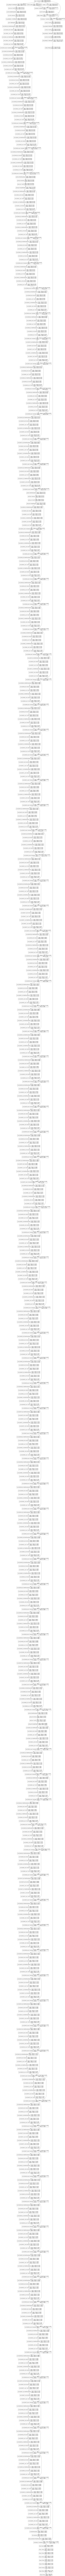

In [34]:
keras.utils.vis_utils.plot_model(model,to_file='model_Net.png',show_shapes=True, show_layer_names=True)

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
# del X


In [37]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True)

In [38]:
from keras.callbacks import *
# filepath='./val_aux_output_accuracy:{val_accuracy:.3f}-epochs:{epoch:03d}.hdf5'
filepath = './Best_model_6.hdf5'
#earlyStopping = EarlyStopping(monitor='val_aux_output_loss', patience=10, verbose=0, mode='min')
#mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose = 1, save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, mode='max',patience=2,verbose=1,min_lr=0.0001)
#callbacks_list = [checkpoint]
callbacks_list = [checkpoint, reduce_lr]

In [39]:
# Train the model.
history=model.fit(x_train,y_train, batch_size =256 , epochs = 100, validation_data=(x_test,y_test),callbacks = callbacks_list)

2022-07-12 19:36:05.720942: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1393459200 exceeds 10% of free system memory.
2022-07-12 19:36:07.135334: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1393459200 exceeds 10% of free system memory.
2022-07-12 19:36:08.158207: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-12 19:36:28.915458: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


111/111 [==============================] - 68s 337ms/step - loss: 4.4675 - accuracy: 0.8241 - val_loss: 4.5588 - val_accuracy: 0.2257

Epoch 00001: val_accuracy improved from -inf to 0.22566, saving model to ./Best_model_6.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
111/111 [==============================] - 29s 262ms/step - loss: 0.8062 - accuracy: 0.9348 - val_loss: 3.0388 - val_accuracy: 0.3290

Epoch 00002: val_accuracy improved from 0.22566 to 0.32901, saving model to ./Best_model_6.hdf5
Epoch 3/100
111/111 [==============================] - 30s 267ms/step - loss: 0.4496 - accuracy: 0.9580 - val_loss: 2.0233 - val_accuracy: 0.6470

Epoch 00003: val_accuracy improved from 0.32901 to 0.64703, saving model to ./Best_model_6.hdf5
Epoch 4/100
111/111 [==============================] - 30s 267ms/step - loss: 0.2879 - accuracy: 0.9796 - val_loss: 1.3850 - val_accuracy: 0.7559

Epoch 00004: val_accuracy improved from 0.64703 to 0.75587, saving model to ./Best_model_6.hdf5
Epoch 5/100
111/111 [==============================] - 29s 261ms/step - loss: 0.2375 - accuracy: 0.9809 - val_loss: 1.6382 - val_accuracy: 0.7169

Epoch 00005: val_accuracy did not improve from 0.75587
Epoch 6/100
111/111 [==============================] - 29s 259ms/step

In [49]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 2s 39ms/step - loss: 1.0982 - accuracy: 0.8258


[1.0982145071029663, 0.8257613778114319]

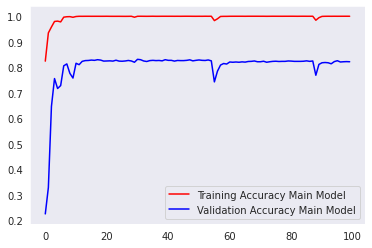

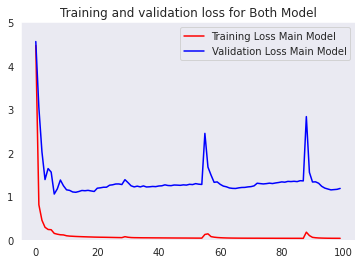

In [41]:
import matplotlib.pyplot as plt
main_acc = history.history['accuracy']

main_val_acc = history.history['val_accuracy']


main_loss = history.history['loss']

main_val_loss = history.history['val_loss']


epochs = range(len(main_acc))

plt.plot(epochs, main_acc, 'r', label='Training Accuracy Main Model')


plt.plot(epochs, main_val_acc, 'b', label='Validation Accuracy Main Model')
plt.legend()
plt.grid(False)
plt.savefig('Net_aaccuracy.png', bbox_inches='tight',dpi=600)

plt.figure()

plt.plot(epochs, main_loss, 'r', label='Training Loss Main Model')

plt.plot(epochs, main_val_loss, 'b', label='Validation Loss Main Model')

plt.ylim([0, 5])
plt.title('Training and validation loss for Both Model')

plt.legend()
plt.grid(False)
plt.savefig('Net_loss.png', bbox_inches='tight',dpi=600)
plt.show()

In [42]:
model.save('./best_model_juba.hdf5')

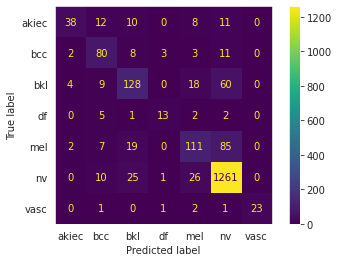

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = model.predict(x_val)
y_pred = (np.argmax(y_pred,axis=1))
y_t = np.argmax(y_val,axis=1)

cm = confusion_matrix(y_t, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["akiec","bcc","bkl","df","mel","nv","vasc"])

disp.plot()
plt.savefig('confusion_Net.png', bbox_inches='tight',dpi=600)
plt.grid(False)
plt.show()

In [44]:
!pip install pycm
from pycm import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 754.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.9/592.9 kB 3.7 MB/s eta 0:00:0000:0100:01


In [45]:
CM = ConfusionMatrix(actual_vector=y_t, predict_vector=y_pred)
CM.relabel(mapping={5:"nv",4:"mel",2:"bkl",1:"bcc",0:"akiec",6:"vasc",3:"df"})

In [46]:
print(CM)

Predict     akiec       bcc         bkl         df          mel         nv          vasc        
Actual
akiec       38          12          10          0           8           11          0           

bcc         2           80          8           3           3           11          0           

bkl         4           9           128         0           18          60          0           

df          0           5           1           13          2           2           0           

mel         2           7           19          0           111         85          0           

nv          0           10          25          1           26          1261        0           

vasc        0           1           0           1           2           1           23          





Overall Statistics : 

95% CI                                                            (0.80915,0.84237)
ACC Macro                                                         0.95022
ARI                      